In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\dipu\\Downloads\\MLP\\income_evaluation.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
#There are question marks in the columns instead of 'NaN' or 'None' values. Question marks signalize missing values, that is why they will be removed.

shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [10]:
income = df.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

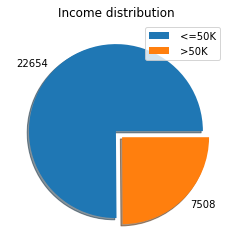

In [11]:
explode = [0, 0.1]
plt.pie(income, labels=income.values, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [12]:
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [14]:
# object type variables cannot be included in a correlation heatmap.
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

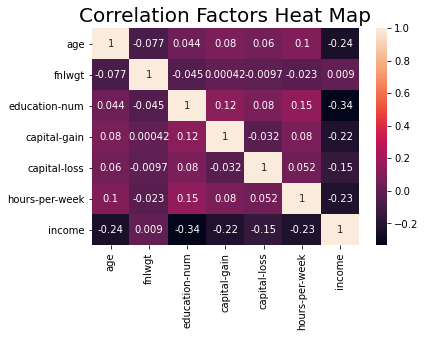

In [15]:
#to see the correaltion between the various variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [16]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = df_final.drop(columns=['income'])
y = df_final['income']

# Instantiate object
ss = StandardScaler()

# Train object on data
ss.fit(X)

# Trandform data
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

In [19]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8100342579290529

In [20]:
fi = ct.feature_importances_
fi

array([1.30112108e-01, 1.92101663e-01, 1.02365504e-01, 1.00652966e-01,
       3.52442363e-02, 6.67791109e-02, 4.15740236e-03, 5.11992924e-03,
       9.41747679e-03, 5.25540794e-03, 6.73069478e-03, 4.26669397e-03,
       0.00000000e+00, 3.35399165e-04, 6.74772735e-04, 2.11060959e-04,
       0.00000000e+00, 2.74868048e-04, 3.66091096e-04, 6.01770772e-04,
       2.85732120e-03, 2.37007999e-03, 2.32850649e-03, 3.06561269e-04,
       3.42305075e-03, 1.46319181e-03, 5.68015418e-04, 1.00920883e-03,
       3.29996343e-03, 2.52791347e-03, 1.40898814e-03, 1.86806861e-01,
       1.05885386e-04, 1.86480459e-03, 8.52474185e-04, 1.25868776e-03,
       4.81237885e-03, 0.00000000e+00, 8.75302205e-03, 1.18836787e-02,
       4.74449134e-03, 3.20744408e-03, 4.44070326e-03, 5.41985305e-03,
       0.00000000e+00, 8.12768421e-03, 4.01425464e-03, 1.03051529e-02,
       4.61335938e-03, 4.58312723e-03, 2.78409884e-03, 2.92059763e-03,
       2.29737060e-03, 1.11191813e-03, 2.12998029e-03, 3.38185356e-03,
      

In [21]:
list(zip(df.columns, fi))

[('age', 0.13011210842814588),
 ('workclass', 0.19210166311037688),
 ('fnlwgt', 0.10236550409553778),
 ('education', 0.10065296576355622),
 ('education-num', 0.035244236303417595),
 ('marital-status', 0.06677911094323272),
 ('occupation', 0.004157402359137309),
 ('relationship', 0.005119929236878449),
 ('race', 0.009417476793510602),
 ('sex', 0.005255407940129298),
 ('capital-gain', 0.006730694781753485),
 ('capital-loss', 0.00426669396720603),
 ('hours-per-week', 0.0),
 ('native-country', 0.000335399164612567),
 ('income', 0.000674772735242534)]

In [22]:
from sklearn.ensemble import RandomForestClassifier # using random forest 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.849486131064206


When using decision tree , the accuracy was 80% , while using the Random Forest Classifier accuracy has increased to 85%